In [1]:
from time import time
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from kftneutrinos import py_first_order, py_second_order_kft

In [2]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
fontsize = 11/1.2*4
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

**-------Input-------**

In [3]:
r_here = 8.0
z_ini = 3.0
Tnu = 0.0001676375864435959
Mvir_over_Msun = 2.03e+12

#masses = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
masses = [0.005, 0.05, 0.1, 0.3]
#masses = np.logspace(-4., -0.2, 7)

Gauss_Laguerre = 80
rtols = np.array([1e-7, 1e-5, 1e-5])
atols = np.array([1e-35, 1e-35, 1e-35])

rtols_2 = np.array([1e-6, 1e-5, 1e-5, 1e-5])
atols_2 = np.array([1e-35, 1e-35, 1e-35, 1e-35])


masses = np.array(masses)

In [4]:
int_free_analytical = 4*np.pi*1.803*Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

first_list = []
tic = time()
for mass in masses:
    val = py_first_order(mass, z_ini, rtols, atols, r_here, Mvir_over_Msun, Gauss_Laguerre, Tnu)
    first_list.append(val)
toc = time()
print(f"Computed {len(masses)} 1PT values in {toc - tic:.5} seconds.")
first = np.array(first_list)/int_free_analytical

The analytical free integral is 1.06738178968e-10.
Computed 4 1PT values in 0.028656 seconds.


# With second order

In [5]:
second_kft_list = []
for mass in masses:
    tic = perf_counter()
    val2 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, Tnu)
    toc = perf_counter()
    print(f"Computed {mass=} in {toc - tic:.5} seconds.")
    second_kft_list.append(val2)

second_kft = (np.array(first_list) + np.array(second_kft_list))/int_free_analytical

Computed mass=0.005 in 0.039023 seconds.
Computed mass=0.05 in 0.038466 seconds.
Computed mass=0.1 in 0.038414 seconds.
Computed mass=0.3 in 0.23469 seconds.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/470218939.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 3])


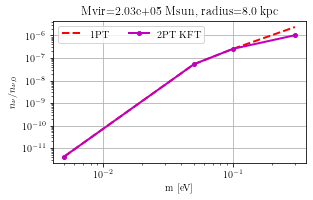

In [6]:
masses = np.array(masses)
lwidth=2
mss=8
fig, ax = plt.subplots(1, 1, figsize=[5, 3])
ax.set_title(f"Mvir={Mvir_over_Msun:.2e} Msun, radius={r_here} kpc")
#ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], '-', label=f"Mertsch+2019", lw=lwidth)
ax.plot(masses, first, 'r--', markersize=mss, label='1PT', lw=lwidth)
ax.plot(masses, second_kft, 'm.-', markersize=mss, label='2PT KFT', lw=lwidth)
ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{\nu,0}$', xscale='log', yscale='log')
# ax.set(xlim=[1e-3, 8e-1], ylim=[1e-4, 1e+3], xticks=[1e-2, 3e-2, 1e-1, 3e-1], yticks=[1e-3, 1e-2, 1e-1, 1e-0, 1e+1])
#ax.set(xlim=[min(masses)*45, max(masses)])
#ax.legend(frameon=True, bbox_to_anchor=(0.5, 1.1), ncol=4, loc='center')
ax.legend(frameon=True, ncol=4)
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('second.pdf')

NB: Currently omitting the Kepler potential, i.e. only using NFW profile.

# Second order, individual terms, KFT

In [7]:
kft_term1_list = []
kft_term2_list = []
kft_term3_list = []
kft_term4_list = []
tic = time()
for mass in masses:
    val1 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, terms_flag=1, Tnu=Tnu)
    kft_term1_list.append(val1)
    val2 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, terms_flag=2, Tnu=Tnu)
    kft_term2_list.append(val2)
    val3 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, terms_flag=3, Tnu=Tnu)
    kft_term3_list.append(val3)
    val4 = py_second_order_kft(mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, terms_flag=4, Tnu=Tnu)
    kft_term4_list.append(val4)
toc = time()
print(f"Computed {4*len(masses)} 2PT values in {toc - tic:.5} seconds.")
kft_term1 = (np.array(first_list) + np.array(kft_term1_list))/int_free_analytical
kft_term2 = (np.array(first_list) + np.array(kft_term2_list))/int_free_analytical
kft_term3 = (np.array(first_list) + np.array(kft_term3_list))/int_free_analytical
kft_term4 = (np.array(first_list) + np.array(kft_term4_list))/int_free_analytical

Computed 16 2PT values in 0.88105 seconds.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/1626801792.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[5, 3])


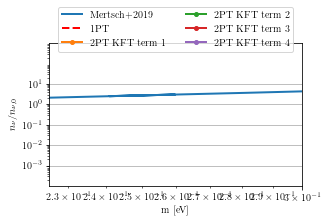

In [8]:
masses = np.array(masses)
lwidth=2
mss=8
fig, ax = plt.subplots(1, 1, figsize=[5, 3])
ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], '-', label=f"Mertsch+2019", lw=lwidth)
ax.plot(masses, first, 'r--', markersize=mss, label='1PT', lw=lwidth)
ax.plot(masses, kft_term1, '.-', markersize=mss, label='2PT KFT term 1', lw=lwidth)
ax.plot(masses, kft_term2, '.-', markersize=mss, label='2PT KFT term 2', lw=lwidth)
ax.plot(masses, kft_term3, '.-', markersize=mss, label='2PT KFT term 3', lw=lwidth)
ax.plot(masses, kft_term4, '.-', markersize=mss, label='2PT KFT term 4', lw=lwidth)
ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{\nu,0}$', xscale='log', yscale='log', xlim=[1e-3, 8e-1], ylim=[1e-4, 1e+3], xticks=[1e-2, 3e-2, 1e-1, 3e-1], yticks=[1e-3, 1e-2, 1e-1, 1e-0, 1e+1])
ax.set(xlim=[min(masses)*45, max(masses)])
ax.legend(frameon=True, bbox_to_anchor=(0.5, 1.1), ncol=2, loc='center')
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('kft_terms.pdf')

# (z2, z1)-integrands

In [9]:
from kftneutrinos import py_second_integrand_z1z2_kft

In [10]:
z2list = np.linspace(0.0, 2., 500)
z1list = z2list

mass = 0.05

integrand_matrix = np.zeros((len(z2list), len(z1list)))

for idx_z2 in range(len(z2list)):
    for idx_z1 in range(len(z1list)):
        if idx_z1 <= idx_z2:
            new_integrand = py_second_integrand_z1z2_kft(z2list[idx_z2], z1list[idx_z1], mass, z_ini, rtols_2, atols_2, r_here, Mvir_over_Msun, Gauss_Laguerre, Tnu)
            integrand_matrix[idx_z2, idx_z1] = new_integrand
integrand_matrix = np.abs(integrand_matrix)

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/2189789519.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(2*width, 2*height))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/2189789519.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(integrand_matrix), origin='lower',extent=[min(z2list), max(z2list), min(z1list), max(z2list)], aspect='equal')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/2189789519.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im)


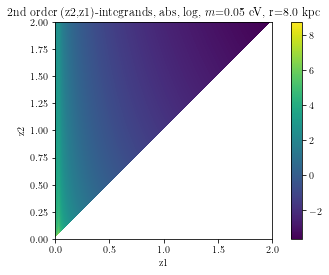

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(2*width, 2*height))
ax.set_title(f'2nd order (z2,z1)-integrands, abs, log, $m$={mass} eV, r={r_here} kpc')
im = ax.imshow(np.log10(integrand_matrix), origin='lower',extent=[min(z2list), max(z2list), min(z1list), max(z2list)], aspect='equal')
ax.set(xlabel='z1', ylabel='z2')
fig.colorbar(im)
fig.savefig('integrands.pdf')

# Density profile

In [12]:
mass = 0.05
# Radii in profile, kpc
rlist = np.linspace(0.1, 15.0, 15)
rlist = np.logspace(-1, 5, 20)
first_list = []
second_list = []
for r in rlist:
    tic = perf_counter()
    first_list.append(py_first_order(mass, z_ini, rtols, atols, r, Mvir_over_Msun, Gauss_Laguerre, Tnu))
    second_list.append(py_second_order_kft(mass, z_ini, rtols_2, atols_2, r, Mvir_over_Msun, Gauss_Laguerre, Tnu))
    print(f"Computed {r=} in {perf_counter() - tic:.3} s.")
first = np.array(first_list)/int_free_analytical
second = (np.array(first_list) + np.array(second_list))/int_free_analytical

Computed r=0.1 in 0.0585 s.
Computed r=0.20691380811147897 in 0.0561 s.
Computed r=0.42813323987193935 in 0.0525 s.
Computed r=0.8858667904100825 in 0.0526 s.
Computed r=1.8329807108324356 in 0.0501 s.
Computed r=3.79269019073225 in 0.0482 s.
Computed r=7.847599703514611 in 0.0458 s.
Computed r=16.23776739188721 in 0.045 s.
Computed r=33.59818286283781 in 0.0421 s.
Computed r=69.51927961775606 in 0.041 s.
Computed r=143.8449888287663 in 0.0409 s.
Computed r=297.6351441631316 in 0.0389 s.
Computed r=615.8482110660261 in 0.0385 s.
Computed r=1274.2749857031322 in 0.0387 s.
Computed r=2636.6508987303555 in 0.0389 s.
Computed r=5455.594781168515 in 0.0384 s.
Computed r=11288.378916846883 in 0.0387 s.
Computed r=23357.21469090121 in 0.0384 s.
Computed r=48329.30238571752 in 0.0385 s.
Computed r=100000.0 in 0.0387 s.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/4127683325.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2, 1, figsize=[5, 5])


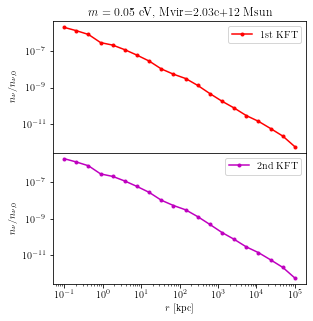

In [13]:
fig, ax = plt.subplots(2, 1, figsize=[5, 5])
ax[0].set_title(f"$m={mass}$ eV, Mvir=2.03e+12 Msun")
ax[0].plot(rlist, first, 'r.-', label='1st KFT')
ax[1].plot(rlist, second, 'm.-', label='2nd KFT')
ax[0].set(ylabel=r'$n_\nu / n_{\nu,0}$')
ax[1].set(xlabel=r'$r$ [kpc]', ylabel=r'$n_\nu / n_{\nu,0}$')
for axis in ax:
    axis.set(xscale='log', yscale='log')
ax[0].legend()
ax[1].legend()
fig.subplots_adjust(bottom=0.1505, left=0.195, hspace=0)
fig.savefig('density_profile.pdf')

# Dependence on z_ini

In [14]:
mass = 0.05
r = 8.0
z_ini_list = np.logspace(-3, 1.6, 10)
first_list = []
second_list = []
for z_ini in z_ini_list:
    tic = perf_counter()
    first_list.append(py_first_order(mass, z_ini, rtols, atols, r, Mvir_over_Msun, Gauss_Laguerre, Tnu))
    second_list.append(py_second_order_kft(mass, z_ini, rtols_2, atols_2, r, Mvir_over_Msun, Gauss_Laguerre, Tnu))
    print(f"Computed {z_ini=} in {perf_counter() - tic:.3} s.")
first = np.array(first_list)/int_free_analytical
second = (np.array(first_list) + np.array(second_list))/int_free_analytical

Computed z_ini=0.001 in 0.0412 s.
Computed z_ini=0.00324422607917163 in 0.0455 s.
Computed z_ini=0.010525002852777327 in 0.0477 s.
Computed z_ini=0.034145488738336005 in 0.152 s.
Computed z_ini=0.11077568505097087 in 0.0456 s.
Computed z_ini=0.3593813663804626 in 0.045 s.
Computed z_ini=1.165914401179831 in 0.153 s.
Computed z_ini=3.782489906389382 in 0.0454 s.
Computed z_ini=12.27125239851189 in 0.0446 s.
Computed z_ini=39.810717055349734 in 0.0392 s.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_86049/923758713.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(2, 1, figsize=[5, 5])


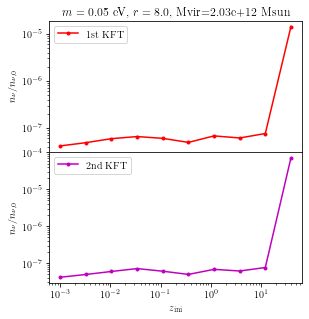

In [15]:
fig, ax = plt.subplots(2, 1, figsize=[5, 5])
ax[0].set_title(f"$m={mass}$ eV, $r={r}$, Mvir=2.03e+12 Msun")
ax[0].plot(z_ini_list, first, 'r.-', label='1st KFT')
ax[1].plot(z_ini_list, second, 'm.-', label='2nd KFT')
ax[0].set(ylabel=r'$n_\nu / n_{\nu,0}$')
ax[1].set(xlabel=r'$z_\mathrm{ini}$', ylabel=r'$n_\nu / n_{\nu,0}$')
for axis in ax:
    axis.set(xscale='log', yscale='log')
ax[0].legend()
ax[1].legend()
fig.subplots_adjust(bottom=0.1505, left=0.195, hspace=0)
fig.savefig('z_ini_profile.pdf')